# Redes Neuronales Recurrentes (RNN)

Son un tipo de arquitectura de redes neuronales artificiales diseñadas para trabajar con datos secuenciales o datos que tienen una estructura temporal. Las RNN tienen conexiones retroactivas que les permiten mantener una "memoria" de eventos anteriores en la secuencia de datos.

La característica fundamental de las RNN es la presencia de bucles en la arquitectura, lo que les permite procesar secuencias de datos de longitud variable y aprender patrones temporales en los datos.

![Diagrama RNN](https://research.aimultiple.com/wp-content/uploads/2021/08/rnn-text.gif)

## Problemas con las RNN

Las RNN tradicionales tienen dificultades para retener información a largo plazo debido a problemas como el desvanecimiento del gradiente, donde los gradientes utilizados para actualizar los pesos de la red pueden volverse muy pequeños y hacer que la red olvide información importante.

# Redes LSTM

Las redes LSTM (Long Short-Term Memory) son un tipo especializado de red neuronal recurrente (RNN) diseñadas para abordar el problema del desvanecimiento del gradiente que puede ocurrir en las RNN tradicionales.

Las redes LSTM incorporan unidades especiales llamadas "celdas de memoria" y mecanismos de control para regular el flujo de información dentro de la red. Esto permite aprender patrones a largo plazo en secuencias temporales y retener información relevante durante largos períodos de tiempo.

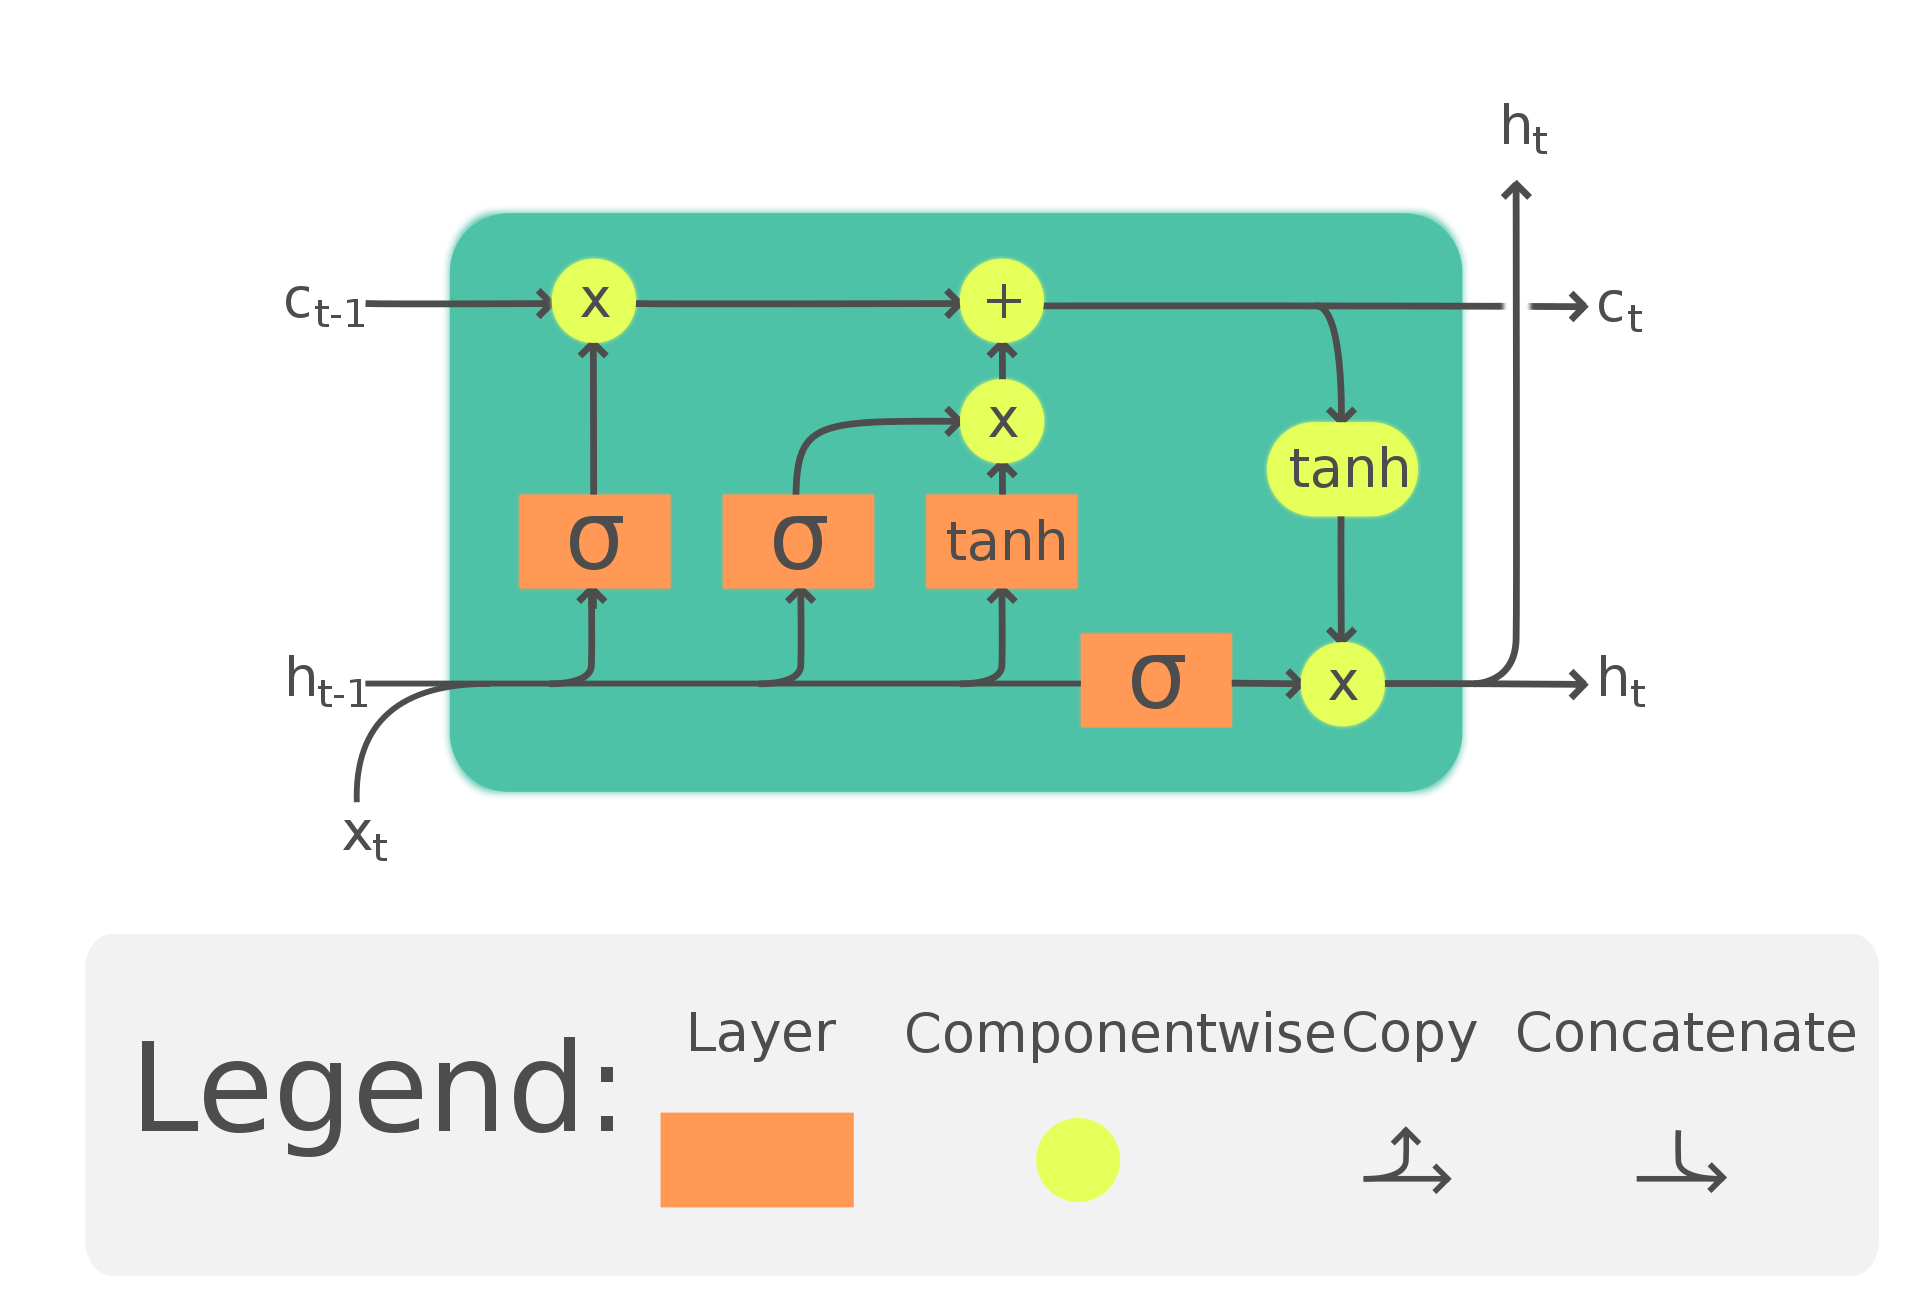

# Componentes


1. **Celda de Memoria (Memory Cell):**
   - La celda de memoria es el componente central de una unidad LSTM y es responsable de almacenar y gestionar la información a largo plazo.
   - La celda de memoria es análoga a una memoria de lectura/escritura que puede ser modificada en cada paso de tiempo.
   - A través de las puertas (gates), la celda de memoria decide qué información retener y cuál olvidar.

2. **Puerta de Olvido (Forget Gate):**
   - La puerta de olvido determina qué información almacenada en la celda de memoria debe ser descartada o olvidada.
   - Utiliza una función de activación sigmoide para producir valores entre 0 y 1, donde 0 indica olvido completo y 1 indica retención completa.
   - La salida de la puerta de olvido se multiplica punto a punto con la información actual de la celda de memoria.

3. **Puerta de Entrada (Input Gate):**
   - La puerta de entrada decide qué nueva información debe ser escrita en la celda de memoria.
   - Consiste en dos partes: una puerta sigmoide que decide qué valores de la entrada se actualizarán y otra puerta tangente hiperbólica que crea un vector de nuevos valores candidatos.
   - La salida de ambas partes se combina para actualizar la información en la celda de memoria.

4. **Actualización de la Celda de Memoria:**
   - Después de aplicar la puerta de olvido y la puerta de entrada, se actualiza la celda de memoria.
   - La celda de memoria anterior se multiplica por la salida de la puerta de olvido y se suma al producto de la puerta de entrada y el vector de nuevos valores candidatos.

5. **Puerta de Salida (Output Gate):**
   - La puerta de salida determina qué parte de la información en la celda de memoria se utilizará como salida de la unidad LSTM.
   - Utiliza una función de activación sigmoide para decidir qué información se mostrará.
   - La salida de la celda de memoria, después de ser filtrada por la puerta de salida, se utiliza como salida de la unidad LSTM en ese paso de tiempo.


# Implementación

Implementaremos LSTM para aprender datos sintéticos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-12-09 16:28:13.416861: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-09 16:28:13.625394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 16:28:13.625461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 16:28:13.644615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 16:28:13.677186: I tensorflow/core/platform/cpu_feature_guar

Generar datos de entrenamiento (serie numérica)

In [2]:
t = np.arange(0, 100, 0.1)  # de cero a cien en pasos de 0.1
sin_wave = np.sin(t) + 0.2 * np.random.normal(size=len(t))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


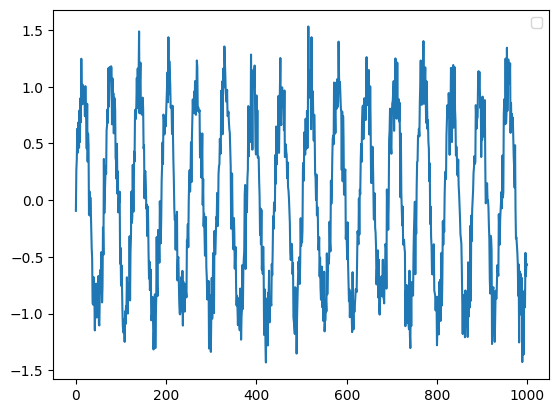

In [7]:
#sin_waveplt.plot(t, sin_wave, label='Datos reales')
plt.plot(sin_wave)
plt.legend()
plt.show()

Crear secuencias de entrada y salida para la LSTM


In [8]:
sequence_length = 10  # Longitud de la secuencia de entrada
X, y = [], []

for i in range(len(sin_wave) - sequence_length):
    seq_x = sin_wave[i:i + sequence_length]
    seq_y = sin_wave[i + sequence_length]
    X.append(seq_x)
    y.append(seq_y)

X = np.array(X)
y = np.array(y)

# Reshape para que sea compatible con la entrada de la LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [9]:
print(X[0], y[0])

[[-0.0947077 ]
 [ 0.26702117]
 [ 0.35830275]
 [ 0.62912816]
 [ 0.41765599]
 [ 0.68387221]
 [ 0.55157212]
 [ 0.46117372]
 [ 0.79152779]
 [ 0.51221472]] 0.8985558126100451


Crear el modelo LSTM


In [14]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))  # 50 unidades de memoria
# Común aquí poner dropouts
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo

In [11]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 0.3084
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1109
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0631
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 9/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0552
Epoch 10/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0570
Epoch 11/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 13/100
31/31 [=================

Realizar predicciones

In [12]:
# Generar nuevas secuencias para predecir
test_seq = sin_wave[-sequence_length:]
test_seq = np.reshape(test_seq, (1, sequence_length, 1))  # Las redes piden estas entradas muy especificas

predicted_values = []

for _ in range(300):
    predicted_value = model.predict(test_seq)
    predicted_values.append(predicted_value[0, 0])
    test_seq = np.roll(test_seq, -1)
    test_seq[0, -1, 0] = predicted_value

1/1 [==============================] - 0s 13ms/step


/tmp/ipykernel_32/2510458397.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_seq[0, -1, 0] = predicted_value


1/1 [==============================] - 0s 15ms/step


Visualizar los resultados

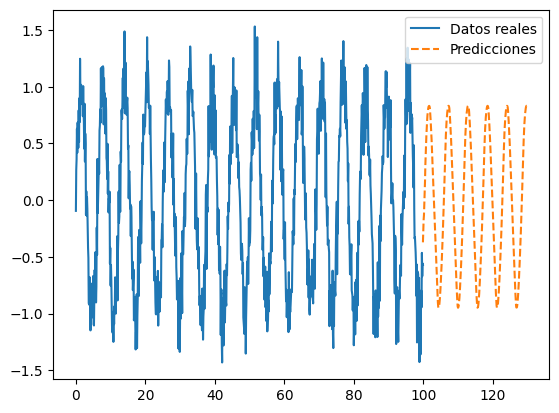

In [13]:
t2 = np.arange(max(t), max(t)+len(predicted_values)*0.1, 0.1)

plt.plot(t, sin_wave, label='Datos reales')
plt.plot(t2, predicted_values, label='Predicciones', linestyle='dashed')
plt.legend()
plt.show()